# EuroSciPy 2018

Martin Christen, August 2018<br/>
martin.christen@fhnw.ch

## Handling Geospatial Data using Python, Part I: Base Modules

What we learn today:

* Reading Vector File Formats (Shapefiles, GeoJSON, ...)
* Reading Raster File Formats (GeoTiff, ...)
* Shapely: Manipulation and analysis of geometric objects ( https://github.com/Toblerity/Shapely )
* Fiona - The pythonic way to handle vector data ( https://github.com/Toblerity/Fiona )
* rasterio - The pythonic way to handle raster data ( https://github.com/mapbox/rasterio )
* pyproj - transforming spatial reference systems ( https://github.com/jswhit/pyproj ) 
* Creating maps using Basemap & Folium ( https://matplotlib.org/basemap/ & https://github.com/python-visualization/folium )

In this notebook the following data is used:

* Natural Earth Dataset, https://www.naturalearthdata.com/ (public domain)
* Blue Marble: Next Generation was produced by Reto Stöckli, NASA Earth Observatory (NASA Goddard Space Flight Center)
* geonames: http://www.geonames.org/ CC License

## 1. Installation

(This tutorial requires anaconda, if you don't have it yet, download it here: https://www.anaconda.com/download/ )

**This notebook requires Python 3.6 (or higher)** (jupyter notebook not lab)

### 1.1 Installing Modules

Install the main modules using conda, dependencies will be resolved (gdal etc.)

    conda install shapely
    conda install fiona
    conda install rasterio
    conda install geopandas
    conda install folium -c conda-forge
    conda install basemap -c conda-forge

## 2. Shapely

http://toblerity.org/shapely

http://toblerity.org/shapely/manual.html

Shapely is a BSD-licensed Python package for **manipulation** and **analysis** of **planar geometric objects**. 

* Shapely is **not** concerned with data formats or coordinate systems.
* Shapely is based on the widely deployed GEOS (the engine of PostGIS) and JTS (from which GEOS is ported) libraries.

### 2.1 Simple Feature Access

http://www.opengeospatial.org/standards/sfa

https://en.wikipedia.org/wiki/Simple_Features


**Simple Feature Access** is both an Open Geospatial Consortium (OGC) and International Organization for Standardization (ISO) standard **ISO 19125** that specifies a common storage and access model of mostly two-dimensional geometries (point, line, polygon, multi-point, multi-line, etc.) used by geographic information systems.

Shapely supports the following Features:

* Point
* LineString
* LinearRing          
* Polygon
* MultiLineString
* MultiPoint
* MultiPolygon


### 2.2 Spatial Data Model

The fundamental types of geometric objects implemented by Shapely are points, curves, and surfaces. Each is associated with three sets of (possibly infinite) points in the plane. The interior, boundary, and exterior sets of a feature are mutually exclusive and their union coincides with the entire plane

* A Point has an interior set of exactly one point, a boundary set of exactly no points, and an exterior set of all other points. A Point has a topological dimension of 0.

* A Curve has an interior set consisting of the infinitely many points along its length (imagine a Point dragged in space), a boundary set consisting of its two end points, and an exterior set of all other points. A Curve has a topological dimension of 1.

* A Surface has an interior set consisting of the infinitely many points within (imagine a Curve dragged in space to cover an area), a boundary set consisting of one or more Curves, and an exterior set of all other points including those within holes that might exist in the surface. A Surface has a topological dimension of 2.

### 2.3 Examples

In [ ]:
from shapely.geometry import Polygon

polygon1 = Polygon([(30, 10), (40, 40), (20, 35), (10, 20), (30, 10)])

print(f"Polygon area: {polygon1.area}, polygon length: {polygon1.length}") 

You can display shapely objects directly in the Jupyter Notebook. It is more or less a "debug" output.

It is also possible to display this in matplotlib/descartes, we will see later how to bring this directly on a map)

In [ ]:
polygon1

In [ ]:
polygon2 = Polygon([(20,20),(80,30),(50,40),(20,20)])
polygon2

In [ ]:
polygon2.union(polygon1)

In [ ]:
polygon2.intersection(polygon1)

In [ ]:
polygon2.symmetric_difference(polygon1)

In [ ]:
result = polygon2.symmetric_difference(polygon1)

print(f"Polygon area: {result.area}, polygon length: {result.length}")

In [ ]:
result.wkt

In [ ]:
s = result.wkt
type(s)

In [ ]:
import shapely.wkt

mypolygon = shapely.wkt.loads(s)
mypolygon

There are also several binary operations available:

- **contains** (Returns True if the interior of the object intersects the interior of the other but does not contain it, and the dimension of the intersection is less than the dimension of the one or the other.)
- **intersects** (Returns True if the boundary and interior of the object intersect in any way with those of the other.)
- **witin** (Returns True if the object’s boundary and interior intersect only with the interior of the other (not its boundary or exterior).
- **touches** (Returns True if the objects have at least one point in common and their interiors do not intersect with any part of the other.)
- **crosses** (Returns True if the interior of the object intersects the interior of the other but does not contain it, and the dimension of the intersection is less than the dimension of the one or the other.)
- **equals** (Returns True if the set-theoretic boundary, interior, and exterior of the object coincide with those of the other.)

In [ ]:
polygon1.intersects(polygon2)

In [ ]:
polygon1.within(polygon2)

In [ ]:
polygon1.equals(polygon1)

## 3. Basemap & Spatial Reference Systems

Example: https://www.openstreetmap.org/

### 3.1 Coordinate Transformations using pyProj

In [ ]:
import pyproj

In [ ]:
wgs84=pyproj.Proj("+init=EPSG:4326")
webmercator=pyproj.Proj("+init=EPSG:3857")

# EPSG Codes: http://epsg.io/

In [ ]:
r0 = pyproj.transform(wgs84, webmercator, 11.1155568, 46.064887) 

print(r0)

In [ ]:
r1 = pyproj.transform(webmercator, wgs84, 1237378.122859708, 5790753.511617366)

print(r1)

### 3.2 Basemap Module

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
plt.figure(figsize=(9, 15))

m = Basemap(projection='cyl')     # llcrnrlat=-90,urcrnrlat=90, llcrnrlon=-180,urcrnrlon=180

m.drawcoastlines(color="black")
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

plt.title("Equidistant Cylindrical Projection")
plt.show()

There are a lot of different map projections available:

https://matplotlib.org/basemap/users/mapsetup.html


Map Projections can be:

* conformal - preserve angles (locally)
* equal-area - preserve area
* equidistant - preserve distance

In [ ]:
plt.figure(figsize=(9, 15))

m = Basemap(projection='cyl')     # llcrnrlat=-90,urcrnrlat=90, llcrnrlon=-180,urcrnrlon=180

m.bluemarble() # https://visibleearth.nasa.gov/

plt.title("Equidistant Cylindrical Projection (Blue Marble)")
plt.show()

In [ ]:
plt.figure(figsize=(9, 15))

m = Basemap(projection='cyl')     # llcrnrlat=-90,urcrnrlat=90, llcrnrlon=-180,urcrnrlon=180

m.shadedrelief() # http://www.shadedrelief.com/

plt.title("Equidistant Cylindrical Projection (Shaded Relief)")
plt.show()

In [ ]:
plt.figure(figsize=(9, 15))

m = Basemap(projection='cyl')     # llcrnrlat=-90,urcrnrlat=90, llcrnrlon=-180,urcrnrlon=180

m.etopo() # https://www.ngdc.noaa.gov/mgg/global/global.html
# ETOPO1 is a 1 arc-minute global relief model of Earth's surface that integrates 
# land topography and ocean bathymetry

plt.title("Equidistant Cylindrical Projection (etopo)")
plt.show()

In [ ]:
plt.figure(figsize=(9, 15))

m = Basemap(projection='cyl', llcrnrlat=30,urcrnrlat=50, llcrnrlon=0,urcrnrlon=20)

m.etopo()

# plot using matplotlib...
m.plot(11.1155568, 46.064887, "ro", markersize=8) # Trento
plt.text(11.1155568, 46.064887, "Trento", fontsize=16, color="white")

plt.title("Plot")
plt.show()

## Other Projections

In [ ]:
plt.figure(figsize=(9, 9))
m = Basemap(projection='merc',llcrnrlat=-85.15,urcrnrlat=85.15,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

plt.title("Mercator Projection (Gerhard Mercator 1512-1594)")
plt.show()

### Geodetic Line: Trento to New York

In [ ]:
g = pyproj.Geod(ellps='WGS84')

startlong = 11.1155568
startlat = 46.064887

endlong = -74.001457
endlat = 40.7094328

lonlats = g.npts(startlong, startlat, endlong, endlat, 14)

lonlats = [(startlong, startlat)] + lonlats +  [(endlong, endlat)]    # Append start and end...

print(lonlats)

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 9))
m = Basemap(projection='cyl')     # llcrnrlat=-90,urcrnrlat=90, llcrnrlon=-180,urcrnrlon=180

m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

for coord in lonlats:
    m.plot(coord[0], coord[1], 'ro', markersize=8)

#m.drawgreatcircle(startlong,startlat,endlong,endlat,linewidth=2,color='b')
   
    
plt.title("Trento to New York")
plt.show();

print(m.proj4string)

In [ ]:
plt.figure(figsize=(9, 9))
# lon_0, lat_0 are the center point of the projection.
# resolution = 'l' means use low resolution coastlines.
m = Basemap(projection='ortho',lon_0=-30,lat_0=40,resolution='l')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')

m.drawmapboundary(fill_color='aqua')

for coord in lonlats:
    x,y = m(coord[0], coord[1])
    m.plot(x,y, 'ro', markersize=8)

m.drawgreatcircle(startlong,startlat,endlong,endlat,linewidth=2,color='b')
        
plt.title("Full Disk Orthographic Projection - Trento to New York")
plt.show()

## 4. Fiona

https://github.com/Toblerity/Fiona

Spatial information is not only geometry. Together with it we always have metadata (properties). Lets look at a first dataset.


### 4.1 Reading Vector Data

In [ ]:
import fiona

c = fiona.open('data/ne_10m_airports/ne_10m_airports.shp', 'r')

airport = next(iter(c))
airport

In [ ]:
airport['properties']['name']

In [ ]:
airport['geometry']['type']

In [ ]:
airport['geometry']['coordinates']

In [ ]:
c.close()

Lets read all data. There are basically two ways:

a) load everything to memory: (if dataset isn't too large...)

    alldata = list(c)
    
b) iterate through all data: (one by one):

    for element in c:
        ...
    

In [ ]:
with fiona.open('data/ne_10m_airports/ne_10m_airports.shp', 'r') as c:
    for airport in c:
        if airport['properties']['iata_code'] == "VCE":
            print(airport['properties']['name'])
            print(airport['geometry']['coordinates'])
            print(airport['properties']['wikipedia'])        


Coordinate System ? (Coordinate Reference System?)

In [ ]:
with fiona.open('data/ne_10m_airports/ne_10m_airports.shp', 'r') as c:
    print(c.crs)

EPSG: 4326 look it up at: http://epsg.io/

( http://epsg.io/4326 )


For transformations to other spatial reference systems, use **pyproj**


Lets look at another dataset:

In [ ]:
import fiona

c = fiona.open('data/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp', 'r')

country = next(iter(c))
country;

In [ ]:
print(country['properties']['NAME'])

In [ ]:
print(country['properties']['NAME_ZH'])

In [ ]:
print(country['properties']['CONTINENT'])

In [ ]:
print(country['properties']['POP_EST'])
print(country['properties']['POP_YEAR'])

In [ ]:
with fiona.open('data/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp', 'r') as c:
    for country in c:
        if country['properties']['NAME'] == "Italy":
            print(country['properties']['POP_EST'])
            print(country['properties']['POP_YEAR'])   
            print(country['geometry']['type'])
            # print(country['geometry']['coordinates']) # you don't want to print all coordinates!
            geometry = country['geometry']


### 4.2 Example: find Airports in Italy

In [ ]:
from shapely.geometry import shape
from shapely.geometry import MultiPolygon

it = MultiPolygon(shape(geometry))
it

In [ ]:
from shapely.geometry import Point

with fiona.open('data/ne_10m_airports/ne_10m_airports.shp', 'r') as c:
    for airport in c:      
        position = Point(airport['geometry']['coordinates'])
        if position.within(it):
            print(airport['properties']['iata_code'], airport['properties']['name'], airport['geometry']['coordinates'])

### 4.3 Example: find Populated Places in Italy

In [ ]:
import fiona

with fiona.open('data/ne_10m_populated_places_simple/ne_10m_populated_places_simple.shp', 'r') as c:
    for place in c:
        geom = place["geometry"]
        position = Point(place['geometry']['coordinates'])
        name = place["properties"]["name"]
        pop = int(place["properties"]["pop_max"])
        if pop>100000 and position.within(it):
            print(name, pop, position)


## 5. Rasterio

https://github.com/mapbox/rasterio

Based on GDAL: https://www.gdal.org/


### 5.1 Reading data

    rasterio.open(fp, mode='r', driver=None, width=None, height=None, count=None, crs=None, transform=None, dtype=None, nodata=None, **kwargs)
    
    
#### Parameters:	
**fp**: string or file
  A filename or URL, or file object opened in binary mode.

**mode**: string
“r” (read), “r+” (read/write), or “w” (write)

**driver**: string
Driver code specifying the format name (e.g. “GTiff” or “JPEG”). See GDAL docs at http://www.gdal.org/formats_list.html (optional, required for writing).

**width**: int
Number of pixels per line (optional, required for write).

**height**: int
Number of lines (optional, required for write).

**count**: int > 0
Count of bands (optional, required for write).

**dtype**: rasterio.dtype
the data type for bands such as rasterio.ubyte for 8-bit bands or rasterio.uint16 for 16-bit bands (optional, required for write)

**crs**: dict or string
Coordinate reference system (optional, recommended for write).

**transform**: Affine instance
Affine transformation mapping the pixel space to geographic space (optional, recommended for writing).

**nodata**: number
Defines pixel value to be interpreted as null/nodata (optional, recommended for write, will be broadcast to all bands).

In [ ]:
import rasterio

dataset = rasterio.open('data/BlueMarble.tif', 'r')

In [ ]:
dataset.name

In [ ]:
dataset.mode

In [ ]:
dataset.count # number of raster bands, in our case 3 for r,g,b

In [ ]:
dataset.indexes

In [ ]:
dataset.width

In [ ]:
dataset.height

In [ ]:
dataset.crs

In [ ]:
dataset.affine  # affine transformation pixel to crs

In [ ]:
dataset.affine * (0, 0)

In [ ]:
~dataset.affine # inverse affine transformation crs to pixel

In [ ]:
~dataset.affine * (0,0)

In [ ]:
px,py = ~dataset.affine * (11.1155568, 46.064887) # Trento
print(px,py)

In [ ]:
dataset.bounds

In [ ]:
print(dataset.bounds.left)
print(dataset.bounds.bottom)
print(dataset.bounds.right)
print(dataset.bounds.top)

### 5.2 Plot using Matplotlib

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
r = dataset.read(1)
g = dataset.read(2)
b = dataset.read(3)

In [ ]:
rgb = np.dstack((r,g,b))  # stack r,g,b so we can display it...
rgb

In [ ]:
fig, ax = plt.subplots(figsize=(15,9))
ax.imshow(rgb, interpolation='nearest')
ax.plot(px,py, 'ro'); 

### 5.3 Creating Overviews

Overviews are reduced resolution versions of the dataset that can speed up rendering when you don't need full resolution. 

By precomputing the upsampled pixels, rendering can be **significantly faster** when zoomed out.

In [2]:
import shutil

path = shutil.copy('data/BlueMarble.tif', 'data/BlueMarbleResampling.tif')

In [3]:
import rasterio

src = rasterio.open("data/BlueMarbleResampling.tif", 'r')
for i in src.indexes:
    print(src.overviews(i))
src.close()

[]
[]
[]


In [4]:
from rasterio.enums import Resampling

dst = rasterio.open("data/BlueMarbleResampling.tif", 'r+')
dst.build_overviews([2, 4, 8, 16], Resampling.average)
dst.update_tags(ns='rio_overview', resampling='average') # optional
dst.close()

In [6]:
src = rasterio.open("data/BlueMarbleResampling.tif", 'r')
for i in src.indexes:
    print(src.overviews(i))
src.close()

[2, 4, 8, 16]
[2, 4, 8, 16]
[2, 4, 8, 16]


In [16]:
src = rasterio.open("data/BlueMarbleResampling.tif", 'r')

r = src.read(1, out_shape=(1, int(src.height / 4), int(src.width / 4)))
g = src.read(2, out_shape=(1, int(src.height / 4), int(src.width / 4)))
b = src.read(3, out_shape=(1, int(src.height / 4), int(src.width / 4)))

rgb = np.dstack((r,g,b))  # stack r,g,b so we can display it...
rgb

src.close()

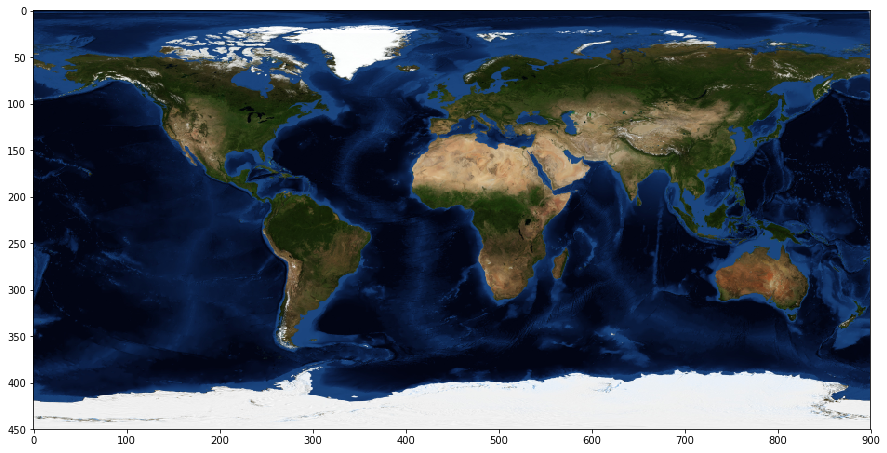

In [19]:
fig, ax = plt.subplots(figsize=(15,9))
ax.imshow(rgb, interpolation='nearest');

### 5.4 Windowed read

In [20]:
dataset = rasterio.open('data/BlueMarbleResampling.tif')

w = ((256,512),(1024,1280))

r = dataset.read(1, window=w)
g = dataset.read(2, window=w)
b = dataset.read(3, window=w)

rgb = np.dstack((r,g,b))

dataset.close()

## 6. Folium

http://python-visualization.github.io/folium/



In [ ]:
import folium

In [ ]:
m = folium.Map(location=[47.37825,8.5367835], zoom_start=14) 
m

### Different Maps

In [ ]:
m = folium.Map(location=[47,8],
           tiles='Stamen Toner',
           zoom_start=6)
m

In [ ]:
m = folium.Map(location=[47,8],
           tiles='Mapbox Bright',
           zoom_start=6)
m

In [ ]:
m = folium.Map(location=[47,8],
           tiles='Mapbox Control Room',
           zoom_start=6)
m

In [ ]:
m = folium.Map(location=[47,8],
           tiles='openstreetmap',
           zoom_start=6)
m

More examples (for some you need API keys)

http://deparkes.co.uk/2016/06/10/folium-map-tiles/

### Adding Markers

In [ ]:
m = folium.Map(location=[47.37825,8.5367835], zoom_start=16)

folium.Marker([47.37695,8.5387885], popup="Hotel Schweizerhof").add_to(m)
folium.Marker([47.376386,8.5386506], popup="Hotel St. Gotthard").add_to(m)
m

In [ ]:
help(folium.Icon)

In [ ]:
m = folium.Map(location=[47.37825,8.5367835], zoom_start=16)

folium.Marker([47.37695,8.5387885], 
              popup="Hotel Schweizerhof",
              icon=folium.Icon(color="red", prefix="fa", icon="hotel")).add_to(m)

folium.Marker([47.376386,8.5386506], 
              popup="Hotel St. Gotthard",
              icon=folium.Icon(color="green", prefix="fa", icon="hotel")).add_to(m)

folium.Marker([47.376192, 8.540005], 
              popup="Hotel Townhouse", 
              icon=folium.Icon(color="blue", prefix="fa", icon="hotel")).add_to(m)

m

In [ ]:
m = folium.Map(location=[0,0], zoom_start=2)

red = "red"
green = "green"

# Remember: Populated Places in Italy:
with fiona.open('data/ne_10m_populated_places_simple/ne_10m_populated_places_simple.shp', 'r') as c:
    for place in c:
        geom = place["geometry"]
        position = Point(place['geometry']['coordinates'])
        name = place["properties"]["name"]
        pop = int(place["properties"]["pop_max"])
        if pop>100000 and position.within(it):
            lng, lat = place['geometry']['coordinates']
            if name == "Trento":
                color = "green"
            else:
                color = "red"
                
            folium.Marker([lat, lng], 
                            popup=name + "<br/>" + str(pop),
                           icon=folium.Icon(color=color, prefix="fa", icon="building")).add_to(m)


m



### Adding GeoJson Shape

In [ ]:


center = [46.064887, 11.1155568] 
m = folium.Map(center, zoom_start=6)  

red = "red"
green = "green"

# Remember: Populated Places in Italy:
with fiona.open('data/ne_10m_populated_places_simple/ne_10m_populated_places_simple.shp', 'r') as c:
    for place in c:
        geom = place["geometry"]
        position = Point(place['geometry']['coordinates'])
        name = place["properties"]["name"]
        pop = int(place["properties"]["pop_max"])
        if pop>100000 and position.within(it):
            lng, lat = place['geometry']['coordinates']
            if name == "Trento":
                color = "green"
            else:
                color = "red"
                
            folium.Marker([lat, lng], 
                            popup=name + "<br/>" + str(pop),
                           icon=folium.Icon(color=color, prefix="fa", icon="building")).add_to(m)


folium.GeoJson(it,style_function=lambda feature: {
        'fillColor': 'green',   # you can also replace this with functions with feature as argument
        'color': 'black',
        'weight': 2,
        'dashArray': '5, 5'
    }).add_to(m)

m

# 7. Live Data Example: Earthquakes

https://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

In [ ]:
import requests

url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
#url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/significant_month.geojson"
#url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_month.geojson"

data = requests.get(url)
file = open("earthquakes.geojson","wb")
file.write(data.content)
file.close()

In [ ]:
import fiona

with fiona.open('earthquakes.geojson', 'r') as c:
    for earthquake in c:
        geom = earthquake["geometry"]
        position = Point(earthquake['geometry']['coordinates'])
        magnitude = earthquake["properties"]["mag"]
        title = earthquake["properties"]["title"]
        
        if magnitude >4.5:
            lng = position.x
            lat = position.y
            elv = position.z
            print(title, lng, lat, elv)

In [ ]:
import html

center = [0, 0] 
m = folium.Map(center, zoom_start=2)


with fiona.open('earthquakes.geojson', 'r') as c:
    for earthquake in c:
        geom = earthquake["geometry"]
        position = Point(earthquake['geometry']['coordinates'])
        magnitude = earthquake["properties"]["mag"]
        title = earthquake["properties"]["title"]
        
        if magnitude >4.5:
            lng = position.x
            lat = position.y
            elv = position.z
            folium.CircleMarker([lat, lng], 
                                radius=magnitude,
                                popup=html.escape(title, quote=True),
                                fill=True,
                                color = "#ff0000",
                                fill_color='#ff0000',
                                fill_opacity=1.0).add_to(m)
                                
m